In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
total_entries = len(df)
description_missing_pct = (df['Description'].isnull().sum() / total_entries) * 100
customerid_missing_pct = (df['CustomerID'].isnull().sum() / total_entries) * 100

print(f"Missing Description: {description_missing_pct:.2f}%")
print(f"Missing CustomerID: {customerid_missing_pct:.2f}%")


Missing Description: 0.27%
Missing CustomerID: 24.93%


In [5]:
# Filter the rows where 'Description' is missing
missing_description_rows = df[df['Description'].isnull()]

# Display the rows with missing 'Description'
print(missing_description_rows[['InvoiceNo', 'StockCode', 'Description']])

       InvoiceNo StockCode Description
622       536414     22139         NaN
1970      536545     21134         NaN
1971      536546     22145         NaN
1972      536547     37509         NaN
1987      536549    85226A         NaN
...          ...       ...         ...
535322    581199     84581         NaN
535326    581203     23406         NaN
535332    581209     21620         NaN
536981    581234     72817         NaN
538554    581408     85175         NaN

[1454 rows x 3 columns]


In [6]:
# Select rows where 'InvoiceNo' is equal to 536365
specific_invoice_rows = df[df['StockCode'] == 84581]

# Display the selected rows
print(specific_invoice_rows)

       InvoiceNo StockCode                      Description  Quantity  \
1823      536544     84581  DOG TOY WITH PINK CROCHET SKIRT         1   
7105      536988     84581  DOG TOY WITH PINK CROCHET SKIRT         1   
7694      537050     84581  DOG TOY WITH PINK CROCHET SKIRT         1   
13836     537434     84581  DOG TOY WITH PINK CROCHET SKIRT         1   
16697     537666     84581  DOG TOY WITH PINK CROCHET SKIRT         1   
...          ...       ...                              ...       ...   
517398    580054     84581  DOG TOY WITH PINK CROCHET SKIRT         2   
518666    580115     84581  DOG TOY WITH PINK CROCHET SKIRT         1   
522023    580367     84581  DOG TOY WITH PINK CROCHET SKIRT         1   
524127    580529     84581  DOG TOY WITH PINK CROCHET SKIRT         2   
535322    581199     84581                              NaN        -2   

               InvoiceDate  UnitPrice  CustomerID         Country  
1823   2010-12-01 14:32:00       4.21         NaN  Unit

In [7]:
# Create a list of unique StockCode values from these rows
unique_missing_stockcodes = missing_description_rows['StockCode'].unique().tolist()

# Display the unique list of StockCodes
print(unique_missing_stockcodes)
print(len(unique_missing_stockcodes))

[22139, 21134, 22145, 37509, '85226A', 85044, 20950, 37461, 84670, 21777, '84952C', 35951, 22712, 22028, 85067, 21421, 21414, 21653, 21651, 85126, 21814, 21692, 21648, 21172, 21161, '84534B', 22162, 21535, 35965, 21040, 37464, 21836, '47556B', '84562A', 37474, 21807, 21011, '18098C', 21696, 37476, '84569B', 21027, '84898F', '84968B', 85215, 84270, 90167, 22959, 21054, 20684, 84881, 20941, 21248, 21349, 22155, 21488, 84840, 21486, 21595, '85170A', 20849, 84977, 21661, '72803B', 22034, 35958, 22114, 21690, 21763, 22833, 84688, 85008, 21429, '85167B', 22454, 20966, 21801, 21743, 37467, 21357, 84497, '90042C', '17091A', 84773, '85018C', 20878, 21186, '62095B', 72814, '84802A', '90002D', 22218, '84247C', '90042B', 20892, 21324, 20956, 22353, 21431, 79067, 85084, '35004P', '85135B', 22444, 21895, 22591, 71477, 35400, 21491, 21009, 22734, '35001W', 22830, 85064, 21784, 84689, 84675, 84499, '85230F', 22158, 22501, 90112, 22865, 35957, 22198, 90096, '47591D', 21587, 21589, 21275, '85124C', 2166

In [8]:
# Step 1: Filter the rows where 'Description' is not missing and 'StockCode' is in the missing list
missing_stockcodes = missing_description_rows['StockCode'].unique().tolist()
stockcode_description_dict = df.dropna(subset=['Description']) \
                              [df['StockCode'].isin(missing_stockcodes)] \
                              .drop_duplicates(subset=['StockCode']) \
                              .set_index('StockCode')['Description'].to_dict()

# Display the dictionary of StockCode and Description
print(stockcode_description_dict)
print(len(stockcode_description_dict))

{'84406B': 'CREAM CUPID HEARTS COAT HANGER', '84029G': 'KNITTED UNION FLAG HOT WATER BOTTLE', '84029E': 'RED WOOLLY HOTTIE WHITE HEART.', 22633: 'HAND WARMER UNION JACK', 22632: 'HAND WARMER RED POLKA DOT', 21777: 'RECIPE BOX WITH METAL HEART', 22726: 'ALARM CLOCK BAKELIKE GREEN', 10002: 'INFLATABLE POLITICAL GLOBE ', 'POST': 'POSTAGE', 37370: 'RETRO COFFEE MUGS ASSORTED', 21071: 'VINTAGE BILLBOARD DRINK ME MUG', 82483: 'WOOD 2 DRAWER CABINET WHITE FINISH', '82494L': 'WOODEN FRAME ANTIQUE WHITE ', 21258: 'VICTORIAN SEWING BOX LARGE', 22114: 'HOT WATER BOTTLE TEA AND SYMPATHY', 21033: 'JUMBO BAG CHARLIE AND LOLA TOYS', 22139: 'RETROSPOT TEA SET CERAMIC 11 PC ', 84854: 'GIRLY PINK TOOL SET', 82567: 'AIRLINE LOUNGE,METAL SIGN', 21169: "YOU'RE CONFUSING ME METAL SIGN ", 21175: 'GIN + TONIC DIET METAL SIGN', '37444A': 'YELLOW BREAKFAST CUP AND SAUCER', '37444C': 'PINK BREAKFAST CUP AND SAUCER ', 22719: 'GUMBALL MONOCHROME COAT RACK', 22926: 'IVORY GIANT GARDEN THERMOMETER', 22838: '3 TIER C

<ipython-input-8-f42ecce20b8a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stockcode_description_dict = df.dropna(subset=['Description']) \


In [9]:
# Fill missing Description values using the stockcode_description_dict
df['Description'] = df.apply(
    lambda row: stockcode_description_dict.get(row['StockCode'], row['Description']) if pd.isnull(row['Description']) else row['Description'],
    axis=1
)

# Verify that the missing values have been filled
print(df['Description'].isnull().sum())

112


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541797 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
total_entries = len(df)
description_missing_pct = (df['Description'].isnull().sum() / total_entries) * 100
customerid_missing_pct = (df['CustomerID'].isnull().sum() / total_entries) * 100

print(f"Missing Description: {description_missing_pct:.2f}%")
print(f"Missing CustomerID: {customerid_missing_pct:.2f}%")

Missing Description: 0.02%
Missing CustomerID: 24.93%


In [12]:
# Filter the rows where 'Description' is missing
missing_description_rows = df[df['Description'].isnull()]

# Display the rows with missing 'Description'
print(missing_description_rows[['InvoiceNo', 'StockCode', 'Description']])

       InvoiceNo StockCode Description
1970      536545     21134         NaN
1987      536549    85226A         NaN
1988      536550     85044         NaN
2024      536552     20950         NaN
2026      536554     84670         NaN
...          ...       ...         ...
280754    561498     21610         NaN
281615    561555    37477B         NaN
281616    561557    37477C         NaN
346849    567207    35592T         NaN
497301    578360    84971L         NaN

[112 rows x 3 columns]


As we see above the Decription column have MCAR, so it is good to remove rows.

In [13]:
# Select rows where 'InvoiceNo' is equal to 536365
specific_invoice_rows = df[df['StockCode'] == '35592T']

# Display the selected rows
print(specific_invoice_rows)

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
346849    567207    35592T         NaN         4 2011-09-19 11:01:00   

        UnitPrice  CustomerID         Country  
346849        0.0         NaN  United Kingdom  


In [14]:
# Filter the rows where 'Description' is missing
missing_CustomerID_rows = df[df['CustomerID'].isnull()]

# Display the rows with missing 'Description'
print(missing_CustomerID_rows[['InvoiceNo', 'StockCode', 'Description', 'CustomerID']])

       InvoiceNo StockCode                       Description  CustomerID
622       536414     22139  RETROSPOT TEA SET CERAMIC 11 PC          NaN
1443      536544     21773   DECORATIVE ROSE BATHROOM BOTTLE         NaN
1444      536544     21774   DECORATIVE CATS BATHROOM BOTTLE         NaN
1445      536544     21786                POLKADOT RAIN HAT          NaN
1446      536544     21787             RAIN PONCHO RETROSPOT         NaN
...          ...       ...                               ...         ...
541536    581498    85099B           JUMBO BAG RED RETROSPOT         NaN
541537    581498    85099C    JUMBO  BAG BAROQUE BLACK WHITE         NaN
541538    581498     85150     LADIES & GENTLEMEN METAL SIGN         NaN
541539    581498     85174                 S/4 CACTI CANDLES         NaN
541540    581498       DOT                    DOTCOM POSTAGE         NaN

[135080 rows x 4 columns]


In [15]:
# Select rows where 'InvoiceNo' is equal to 536365
specific_invoice_rows = df[df['InvoiceNo'] == 581498]

# Display the selected rows
print(specific_invoice_rows)

       InvoiceNo StockCode                     Description  Quantity  \
541323    581498   15056bl         EDWARDIAN PARASOL BLACK         2   
541324    581498     20669           RED HEART LUGGAGE TAG         3   
541325    581498     20679           EDWARDIAN PARASOL RED         5   
541326    581498     20712      JUMBO BAG WOODLAND ANIMALS         3   
541327    581498     20713                  JUMBO BAG OWLS         8   
...          ...       ...                             ...       ...   
541536    581498    85099B         JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150   LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174               S/4 CACTI CANDLES         1   
541540    581498       DOT                  DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
541323 2011-12-09 10:26:00      12.46         NaN  United Kingdom  

In [16]:
missing_InvoiceNo = missing_CustomerID_rows['InvoiceNo'].unique().tolist()
InvoiceNo_CustomerID_dict = df.dropna(subset=['CustomerID']) \
                              [df['InvoiceNo'].isin(missing_stockcodes)] \
                              .drop_duplicates(subset=['InvoiceNo']) \
                              .set_index('InvoiceNo')['CustomerID'].to_dict()

print(len(InvoiceNo_CustomerID_dict))

0


<ipython-input-16-99f633765698>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  InvoiceNo_CustomerID_dict = df.dropna(subset=['CustomerID']) \


In the above observation, there are missing values in Description and CustomerID column

1. As in general, removing the whole row where missing values in a column. But before removing, we need to check the distribution before and after remove the row. If the percentage of missing is around 3-4% then we can remove the rows.
2. Also need to check the missing values in a column should be MCAR ( Missing completely at Random)
3. We can remove rows based on Description missing values as it is MCAR.

In [17]:
df = df.dropna(subset=['Description'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541797 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541797 non-null  object        
 1   StockCode    541797 non-null  object        
 2   Description  541797 non-null  object        
 3   Quantity     541797 non-null  int64         
 4   InvoiceDate  541797 non-null  datetime64[ns]
 5   UnitPrice    541797 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541797 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


In [19]:
# Decide to fill remaining missing CustomerID with 'Unknown' as the missing percentage is more in CustomerID column
df['CustomerID'].fillna('Unknown', inplace=True)

<ipython-input-19-89ef7d666466>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['CustomerID'].fillna('Unknown', inplace=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541797 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541797 non-null  object        
 1   StockCode    541797 non-null  object        
 2   Description  541797 non-null  object        
 3   Quantity     541797 non-null  int64         
 4   InvoiceDate  541797 non-null  datetime64[ns]
 5   UnitPrice    541797 non-null  float64       
 6   CustomerID   541797 non-null  object        
 7   Country      541797 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.2+ MB


In [21]:
# 2. Remove duplicate records
df.drop_duplicates(inplace=True)

In [22]:
# 3. Handle anomalies in Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [23]:
# As we have no missing data in the InvoiceDate column, so we can extract year, month, data and weekday.
df['TotalAmount'] = df['Quantity']*df['UnitPrice']
df['Invoice_Year'] = df['InvoiceDate'].dt.year
df['Invoice_Month'] = df['InvoiceDate'].dt.month
df['Invoice_Day'] = df['InvoiceDate'].dt.day
df['Invoice_Weekday'] = df['InvoiceDate'].dt.weekday
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2


In [24]:
#exploring the unique values of each attribute
print("Number of transactions: ", df['InvoiceNo'].nunique())
print("Number of products: ",df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique())

Number of transactions:  19960
Number of products:  3922
Number of customers: 4339


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        524878 non-null  object        
 1   StockCode        524878 non-null  object        
 2   Description      524878 non-null  object        
 3   Quantity         524878 non-null  int64         
 4   InvoiceDate      524878 non-null  datetime64[ns]
 5   UnitPrice        524878 non-null  float64       
 6   CustomerID       524878 non-null  object        
 7   Country          524878 non-null  object        
 8   TotalAmount      524878 non-null  float64       
 9   Invoice_Year     524878 non-null  int32         
 10  Invoice_Month    524878 non-null  int32         
 11  Invoice_Day      524878 non-null  int32         
 12  Invoice_Weekday  524878 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(5)
memory usage: 4

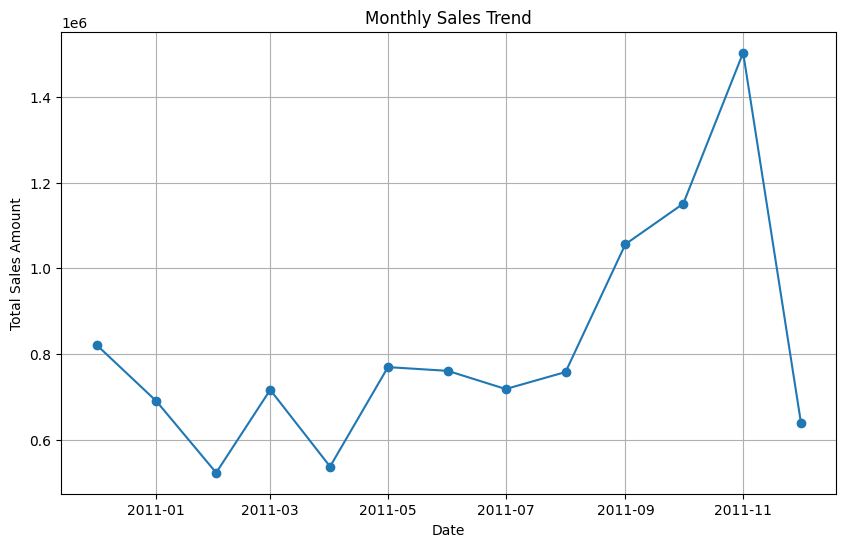

In [26]:
import matplotlib.pyplot as plt

# Aggregate sales by month
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M')).agg({'TotalAmount': 'sum'}).reset_index()
monthly_sales['InvoiceDate'] = monthly_sales['InvoiceDate'].dt.to_timestamp()

# Plot monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['TotalAmount'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

In [27]:
# Top-selling products
top_products = df.groupby('Description').agg({'Quantity': 'sum'}).reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False)

# Display top-selling products
print("Top-selling Products:")
print(top_products.head())

Top-selling Products:
                             Description  Quantity
2387         PAPER CRAFT , LITTLE BIRDIE     80995
2052      MEDIUM CERAMIC TOP STORAGE JAR     78033
3934   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54951
1816             JUMBO BAG RED RETROSPOT     48371
3844  WHITE HANGING HEART T-LIGHT HOLDER     37872


Sales Comparison by Holiday Status:
   is_holiday   TotalAmount
0       False  1.064211e+07


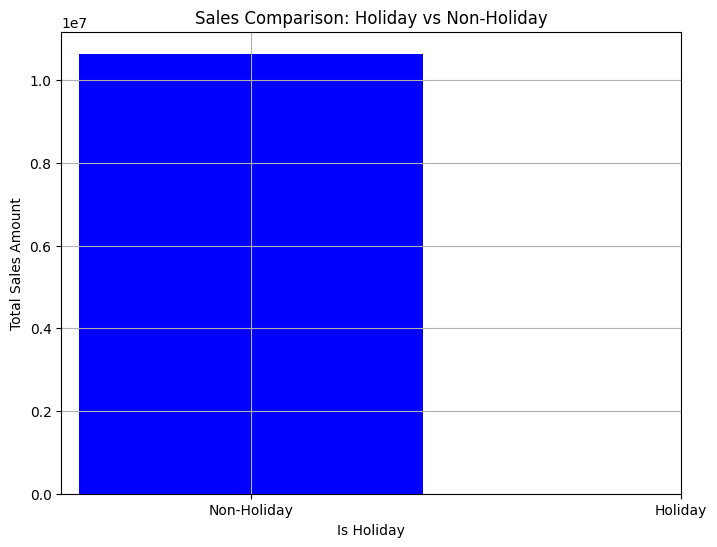

In [28]:
# List of UK holidays (example for the year 2010)
uk_holidays = pd.to_datetime([
    '2011-01-01',  # New Year's Day
    '2011-04-02',  # Good Friday
    '2011-04-05',  # Easter Monday
    '2011-05-03',  # Early May Bank Holiday
    '2011-05-31',  # Spring Bank Holiday
    '2010-08-30',  # Summer Bank Holiday
    '2010-12-25',  # Christmas Day
    '2010-12-26',  # Boxing Day
    '2010-12-27'   # Christmas Holiday (since Christmas Day was on a Saturday)
])

# Create a new column to mark holidays
df['is_holiday'] = df['InvoiceDate'].isin(uk_holidays)

# Aggregate sales by holiday and non-holiday
sales_comparison = df.groupby('is_holiday').agg({'TotalAmount': 'sum'}).reset_index()

# Display results
print("Sales Comparison by Holiday Status:")
print(sales_comparison)

# Plot the sales comparison
plt.figure(figsize=(8, 6))
plt.bar(sales_comparison['is_holiday'].astype(str), sales_comparison['TotalAmount'], color=['blue', 'orange'])
plt.title('Sales Comparison: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.grid(True)
plt.show()

# Customer **Metrics**

### Average Purchase Frequency

In [29]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate purchase frequency
customer_purchases = df.groupby('CustomerID').agg({
    'InvoiceDate': ['min', 'max', 'count']
}).reset_index()

customer_purchases.columns = ['CustomerID', 'FirstPurchaseDate', 'LastPurchaseDate', 'TotalPurchases']

# Calculate time span in days
customer_purchases['DaysSpan'] = (customer_purchases['LastPurchaseDate'] - customer_purchases['FirstPurchaseDate']).dt.days

# Calculate average purchase frequency
customer_purchases['AverageFrequency'] = customer_purchases['TotalPurchases'] / customer_purchases['DaysSpan']

print("Average Purchase Frequency per Customer:")
print(customer_purchases[['CustomerID', 'AverageFrequency']])


Average Purchase Frequency per Customer:
     CustomerID  AverageFrequency
0       12346.0               inf
1       12347.0          0.498630
2       12348.0          0.109929
3       12349.0               inf
4       12350.0               inf
...         ...               ...
4334    18281.0               inf
4335    18282.0          0.101695
4336    18283.0          2.165165
4337    18287.0          0.443038
4338    Unknown        355.338710

[4339 rows x 2 columns]


### Average Spend Per Visit

In [30]:
# Calculate total spend and average spend per visit
customer_spend = df.groupby('CustomerID').agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'count'
}).reset_index()

customer_spend.columns = ['CustomerID', 'TotalSpend', 'TotalVisits']
customer_spend['AverageSpendPerVisit'] = customer_spend['TotalSpend'] / customer_spend['TotalVisits']

print("Average Spend Per Visit per Customer:")
print(customer_spend[['CustomerID', 'AverageSpendPerVisit']])

Average Spend Per Visit per Customer:
     CustomerID  AverageSpendPerVisit
0       12346.0          77183.600000
1       12347.0             23.681319
2       12348.0             57.975484
3       12349.0             24.076027
4       12350.0             19.670588
...         ...                   ...
4334    18281.0             11.545714
4335    18282.0             14.837500
4336    18283.0              2.837074
4337    18287.0             26.246857
4338    Unknown             13.276004

[4339 rows x 2 columns]


### Total Spend Per Customer

In [31]:
# Calculate total spend per customer
total_spend_per_customer = df.groupby('CustomerID').agg({'TotalAmount': 'sum'}).reset_index()
total_spend_per_customer.columns = ['CustomerID', 'TotalSpend']

print("Total Spend per Customer:")
print(total_spend_per_customer)

Total Spend per Customer:
     CustomerID  TotalSpend
0       12346.0    77183.60
1       12347.0     4310.00
2       12348.0     1797.24
3       12349.0     1757.55
4       12350.0      334.40
...         ...         ...
4334    18281.0       80.82
4335    18282.0      178.05
4336    18283.0     2045.53
4337    18287.0     1837.28
4338    Unknown  1754901.91

[4339 rows x 2 columns]


# Product **Metrics**

### Stock Turn Rate

In [32]:
# Calculate stock turn rate
product_sales = df.groupby('StockCode').agg({
    'Quantity': 'sum'
}).reset_index()
product_sales.columns = ['StockCode', 'TotalQuantitySold']

# Assuming you have stock level data or need to estimate
product_sales['StockTurnRate'] = product_sales['TotalQuantitySold'] / 1000  # Example denominator

print("Stock Turn Rate per Product:")
print(product_sales[['StockCode', 'StockTurnRate']])


Stock Turn Rate per Product:
         StockCode  StockTurnRate
0            10002          0.860
1            10080          0.303
2            10120          0.192
3            10125          1.295
4            10133          2.856
...            ...            ...
3917  gift_0001_20          0.010
3918  gift_0001_30          0.007
3919  gift_0001_40          0.003
3920  gift_0001_50          0.004
3921             m          0.001

[3922 rows x 2 columns]


### Average Price

In [33]:
# Calculate average price per product
average_price_per_product = df.groupby('StockCode').agg({
    'UnitPrice': 'mean'
}).reset_index()

average_price_per_product.columns = ['StockCode', 'AveragePrice']

print("Average Price per Product:")
print(average_price_per_product)


Average Price per Product:
         StockCode  AveragePrice
0            10002      1.086620
1            10080      0.410909
2            10120      0.210000
3            10125      0.859785
4            10133      0.652551
...            ...           ...
3917  gift_0001_20     16.708889
3918  gift_0001_30     25.075714
3919  gift_0001_40     33.566667
3920  gift_0001_50     41.890000
3921             m      2.550000

[3922 rows x 2 columns]


### Sales Volume per Product

In [34]:
# Calculate sales volume per product
sales_volume_per_product = df.groupby('StockCode').agg({
    'Quantity': 'sum'
}).reset_index()

sales_volume_per_product.columns = ['StockCode', 'SalesVolume']

print("Sales Volume per Product:")
print(sales_volume_per_product)


Sales Volume per Product:
         StockCode  SalesVolume
0            10002          860
1            10080          303
2            10120          192
3            10125         1295
4            10133         2856
...            ...          ...
3917  gift_0001_20           10
3918  gift_0001_30            7
3919  gift_0001_40            3
3920  gift_0001_50            4
3921             m            1

[3922 rows x 2 columns]


In [35]:
dffrom sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
new_data = df[['InvoiceDate', 'Quantity', 'TotalAmount']]

In [37]:
df.set_index('InvoiceDate', inplace=True)

In [38]:
print(df.dtypes)

InvoiceNo           object
StockCode           object
Description         object
Quantity             int64
UnitPrice          float64
CustomerID          object
Country             object
TotalAmount        float64
Invoice_Year         int32
Invoice_Month        int32
Invoice_Day          int32
Invoice_Weekday      int32
is_holiday            bool
dtype: object


In [39]:
df['TotalAmount'] = pd.to_numeric(df['TotalAmount'], errors='coerce')

In [40]:
df['TotalAmount'].fillna(0, inplace=True)

In [41]:
print(df['TotalAmount'].apply(type).value_counts())

TotalAmount
<class 'float'>    524878
Name: count, dtype: int64


In [42]:
# Identify rows with non-numeric 'TotalAmount' values
non_numeric_values = df[~df['TotalAmount'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_values)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, UnitPrice, CustomerID, Country, TotalAmount, Invoice_Year, Invoice_Month, Invoice_Day, Invoice_Weekday, is_holiday]
Index: []


In [43]:
# Convert 'TotalAmount' to numeric, coercing errors to NaN
df['TotalAmount'] = pd.to_numeric(df['TotalAmount'], errors='coerce')

# Check for NaN values after conversion
nan_rows = df[df['TotalAmount'].isna()]
print("Rows with NaN after conversion:")
print(nan_rows)

Rows with NaN after conversion:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, UnitPrice, CustomerID, Country, TotalAmount, Invoice_Year, Invoice_Month, Invoice_Day, Invoice_Weekday, is_holiday]
Index: []


In [44]:
# Check for string or non-numeric values
non_numeric_values = df[~df['TotalAmount'].apply(lambda x: isinstance(x, (int, float)))]

print("Rows with non-numeric (string or other) values in 'TotalAmount':")
print(non_numeric_values)

Rows with non-numeric (string or other) values in 'TotalAmount':
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, UnitPrice, CustomerID, Country, TotalAmount, Invoice_Year, Invoice_Month, Invoice_Day, Invoice_Weekday, is_holiday]
Index: []


In [45]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalAmount,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Weekday,is_holiday
InvoiceDate,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010,12,1,2,False
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,False
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010,12,1,2,False
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,False
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20,2011,12,9,4,False
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,2011,12,9,4,False
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,2011,12,9,4,False


In [47]:
new_data

,InvoiceDate,Quantity,TotalAmount
0,2010-12-01 08:26:00,6,15.30
1,2010-12-01 08:26:00,6,20.34
2,2010-12-01 08:26:00,8,22.00
3,2010-12-01 08:26:00,6,20.34
4,2010-12-01 08:26:00,6,20.34
...,...,...,...
541904,2011-12-09 12:50:00,12,10.20
541905,2011-12-09 12:50:00,6,12.60
541906,2011-12-09 12:50:00,4,16.60
541907,2011-12-09 12:50:00,4,16.60


In [48]:
new_data.set_index('InvoiceDate', inplace=True)

In [49]:
# Aggregate monthly revenue
monthly_revenue = new_data.resample('M').sum()['TotalAmount']

In [52]:
# Check stationarity
result = adfuller(monthly_revenue)
if result[1] > 0.05:
    monthly_sales_diff = monthly_revenue.diff().dropna()
else:
    monthly_sales_diff = monthly_revenue

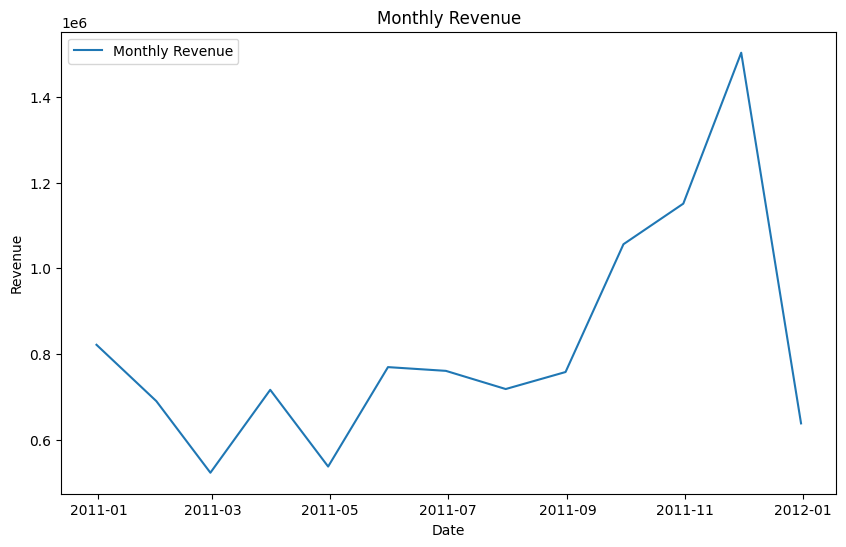

In [53]:
# Plot monthly revenue
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue, label='Monthly Revenue')
plt.title('Monthly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [54]:
# Fit ARIMA model
model = ARIMA(monthly_revenue, order=(5,1,0))  # Adjust order based on ACF/PACF plots
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [55]:
# Forecast
forecast = model_fit.forecast(steps=12)  # Forecast next 12 months

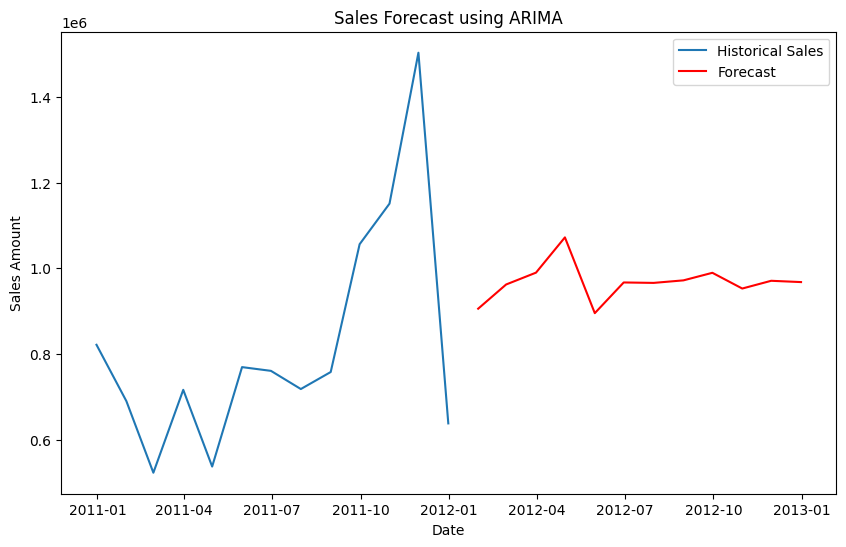

In [57]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue, label='Historical Sales')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Sales Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [58]:
# Fit SARIMA model
sarima_model = SARIMAX(monthly_revenue,
                       order=(1,1,1),       # Non-seasonal parameters
                       seasonal_order=(1,1,1,12))  # Seasonal parameters with period 12
sarima_model_fit = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1233: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


In [59]:
# Forecast
sarima_forecast = sarima_model_fit.get_forecast(steps=12).predicted_mean

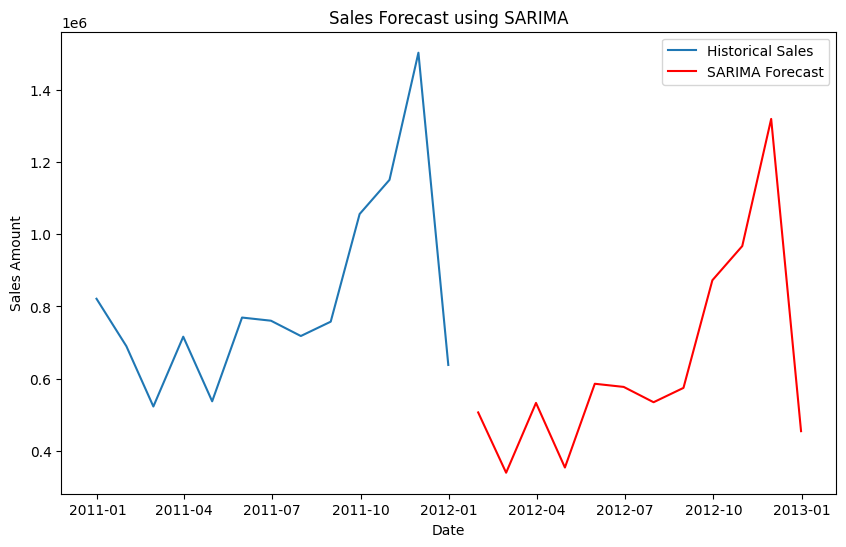

In [60]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue, label='Historical Sales')
plt.plot(sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('Sales Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [62]:
# Fit SARIMA model
sarima_model = SARIMAX(monthly_revenue,
                       order=(1,1,1),       # Non-seasonal parameters (adjust based on ACF/PACF)
                       seasonal_order=(1,1,1,12))  # Seasonal parameters with period 12
sarima_model_fit = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1233: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


In [63]:
# Forecast
forecast_steps = 12  # Forecast next 12 months
forecast = sarima_model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_revenue.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=['Forecast'])

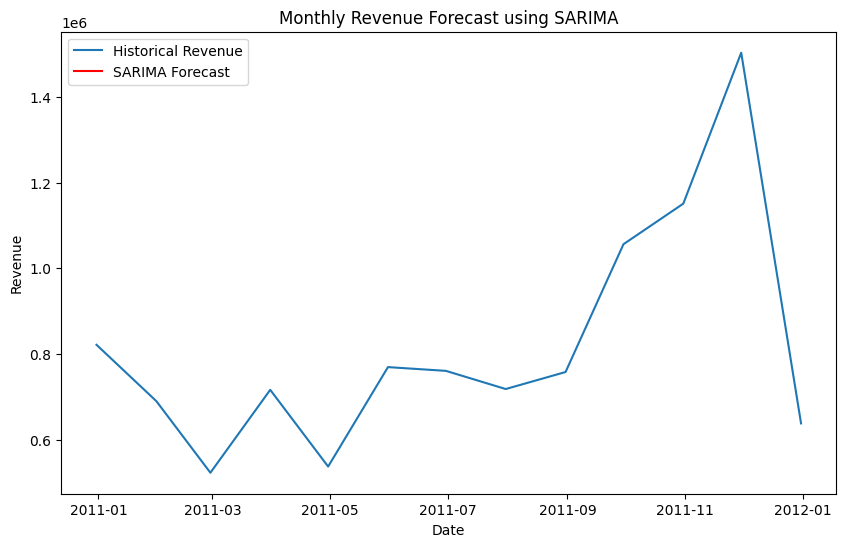

In [64]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue, label='Historical Revenue')
plt.plot(forecast_df, label='SARIMA Forecast', color='red')
plt.title('Monthly Revenue Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [65]:
# Evaluate Model (if test data is available)
# Split the data
train_size = int(len(monthly_revenue) * 0.8)
train, test = monthly_revenue[:train_size], monthly_revenue[train_size:]

In [66]:
# Fit model on training data
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_model_fit = sarima_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [67]:
# Forecast on test data
test_forecast = sarima_model_fit.get_forecast(steps=len(test))
test_forecast_mean = test_forecast.predicted_mean

In [68]:
# Calculate error
mse = mean_squared_error(test, test_forecast_mean)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 299014816793.1354


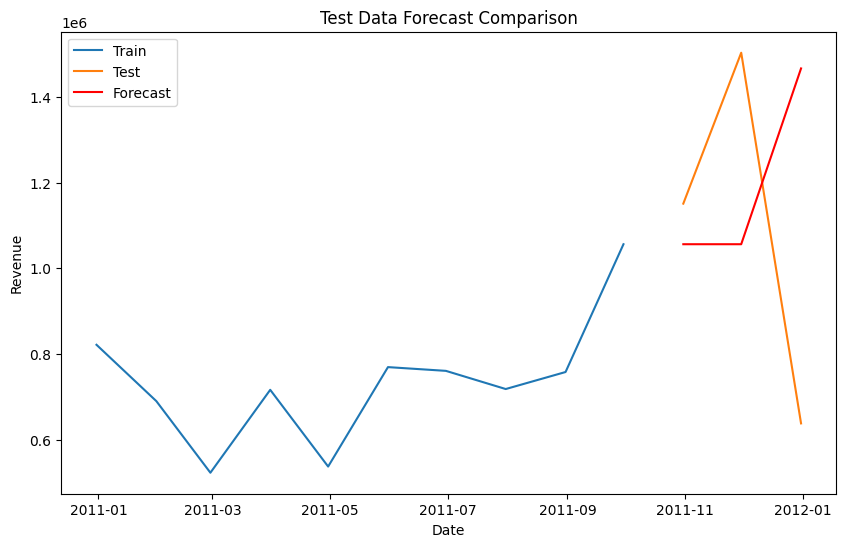

In [69]:
# Plot test results
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test_forecast_mean, label='Forecast', color='red')
plt.title('Test Data Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [70]:
# Create lag features for machine learning model
df['Lag_1'] = df['TotalAmount'].shift(1)
df['Lag_2'] = df['TotalAmount'].shift(2)
df.dropna(inplace=True)

In [71]:
# Define features and target variable
X = df[['Lag_1', 'Lag_2']]
y = df['TotalAmount']

In [72]:
# Time-based splitting
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [73]:
# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
# Forecast
rf_forecast = rf_model.predict(X_test)

In [75]:
# Calculate error metrics
mae = mean_absolute_error(y_test, rf_forecast)
rmse = np.sqrt(mean_squared_error(y_test, rf_forecast))
mape = np.mean(np.abs((y_test - rf_forecast) / y_test)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 16.154377387935114
RMSE: 524.1723206572257
MAPE: 191.04416696925247


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)